In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [4]:
# Load the dataset
df = pd.read_csv(r'D:\programs\data_science\Crop_recommendation.csv')

# Display dataset summary statistics
df_description = df.describe()

c:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecat

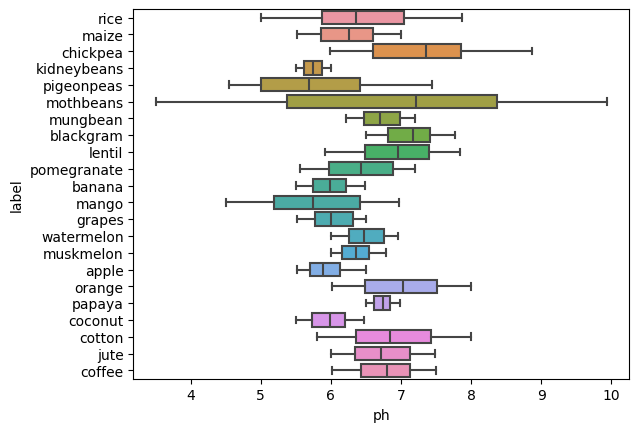

In [5]:
# Create a boxplot
sns.boxplot(y='label', x='ph', data=df)

# Convert the 'label' column to categorical
c = df['label'].astype('category')

# Create a mapping of category codes to labels
targets = dict(enumerate(c.cat.categories))

# Add a 'target' column with categorical codes
df['target'] = c.cat.codes

# Split the data into features (X) and target (y)
y = df['target']
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_score = knn.score(X_test_scaled, y_test)

# K-Nearest Neighbors Classifier with different k values
k_range = range(1, 11)
knn_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    knn_scores.append(knn.score(X_test_scaled, y_test))

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
decision_tree_score = decision_tree.score(X_test, y_test)

# Random Forest Classifier
random_forest = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
rf_train_accuracy = random_forest.score(X_train, y_train)
rf_test_accuracy = random_forest.score(X_test, y_test)

# Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
gb_accuracy = gradient_boosting.score(X_test, y_test)


In [6]:
# Print results
print("Dataset Summary Statistics:")
print(df_description)
print("\nK-Nearest Neighbors Classifier Accuracy:", knn_score)
print("\nDecision Tree Classifier Accuracy:", decision_tree_score)
print("\nRandom Forest Classifier - Training Accuracy:", rf_train_accuracy)
print("Random Forest Classifier - Test Accuracy:", rf_test_accuracy)
print("\nGradient Boosting Classifier Accuracy:", gb_accuracy)


Dataset Summary Statistics:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  

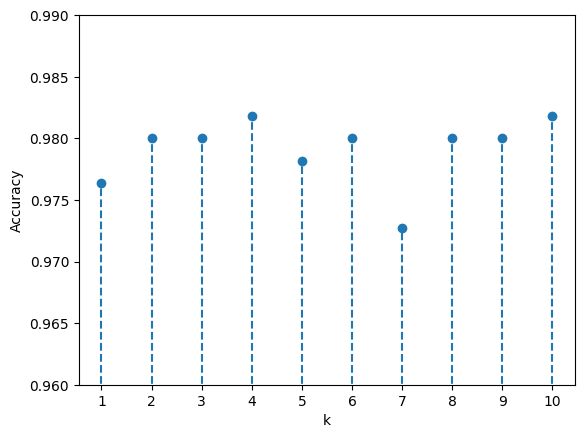

In [7]:
# Plot K-Nearest Neighbors Classifier Accuracy vs. k values
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, knn_scores)
plt.vlines(k_range, 0, knn_scores, linestyle="dashed")
plt.ylim(0.96, 0.99)
plt.xticks([i for i in range(1, 11)])
plt.show()
